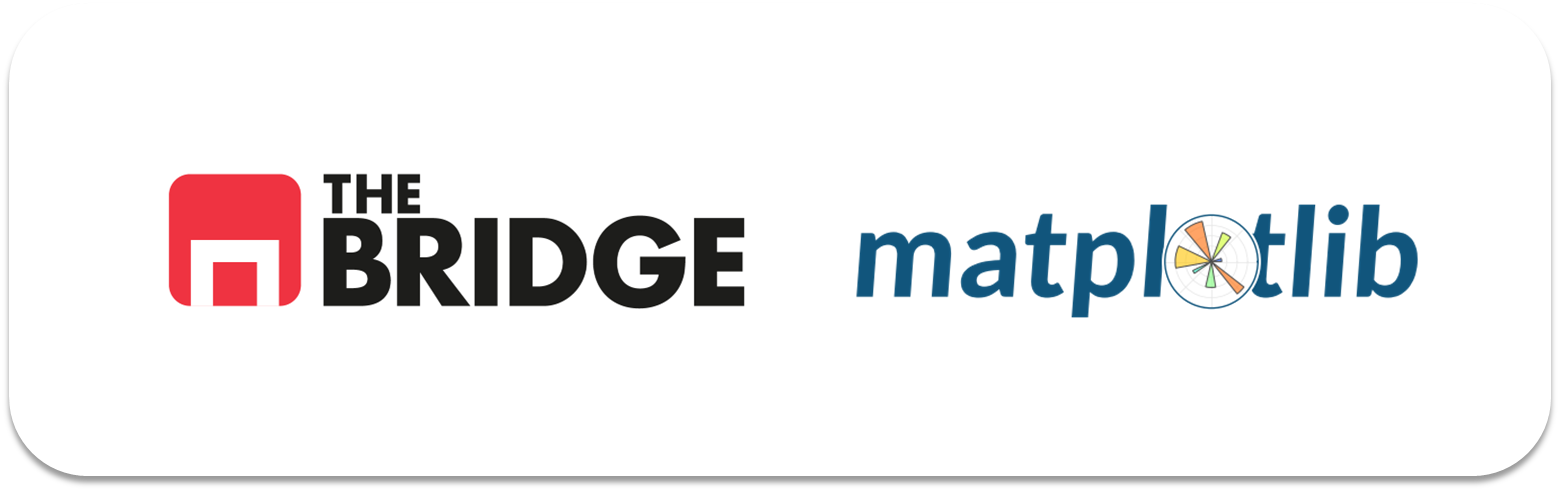

## PRACTICA OBLIGATORIA: VISUALIZACION BASICA

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

In [2]:
!pip install matplotlib

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -------------------------------------- - 7.6/7.8 MB 49.8 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 36.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 43.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 42.2 MB/s eta 0:00:00


Importa los paquetes y módulos que necesites a lo largo del notebook.

In [4]:
!pip install seaborn

In [5]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import matplotlib.font_manager as fm  


## #1

### #1.1

Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv". Muestra parte de su contenido y su descripción. Deshazte de las filas con nulos.

In [8]:


# Ruta completa del archivo
file_path = r"C:\Users\hardr\OneDrive\Documents\california_cities.csv"

# Cargar el archivo CSV
data = pd.read_csv(file_path)

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(data.head())

# Mostrar información general del dataset
print("\nInformación general del dataset:")
print(data.info())

# Mostrar un resumen estadístico de las columnas numéricas
print("\nResumen estadístico del dataset:")
print(data.describe())

Primeras filas del dataset:
   Unnamed: 0         city       latd       longd  elevation_m  elevation_ft  \
0           0     Adelanto  34.576111 -117.432778        875.0        2871.0   
1           1  AgouraHills  34.153333 -118.761667        281.0         922.0   
2           2      Alameda  37.756111 -122.274444          NaN          33.0   
3           3       Albany  37.886944 -122.297778          NaN          43.0   
4           4     Alhambra  34.081944 -118.135000        150.0         492.0   

   population_total  area_total_sq_mi  area_land_sq_mi  area_water_sq_mi  \
0             31765            56.027           56.009             0.018   
1             20330             7.822            7.793             0.029   
2             75467            22.960           10.611            12.349   
3             18969             5.465            1.788             3.677   
4             83089             7.632            7.631             0.001   

   area_total_km2  area_land_km2  

In [10]:
print(data.columns)

Index(['Unnamed: 0', 'city', 'latd', 'longd', 'elevation_m', 'elevation_ft',
       'population_total', 'area_total_sq_mi', 'area_land_sq_mi',
       'area_water_sq_mi', 'area_total_km2', 'area_land_km2', 'area_water_km2',
       'area_water_percent'],
      dtype='object')


### #1.2

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro. Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)
2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

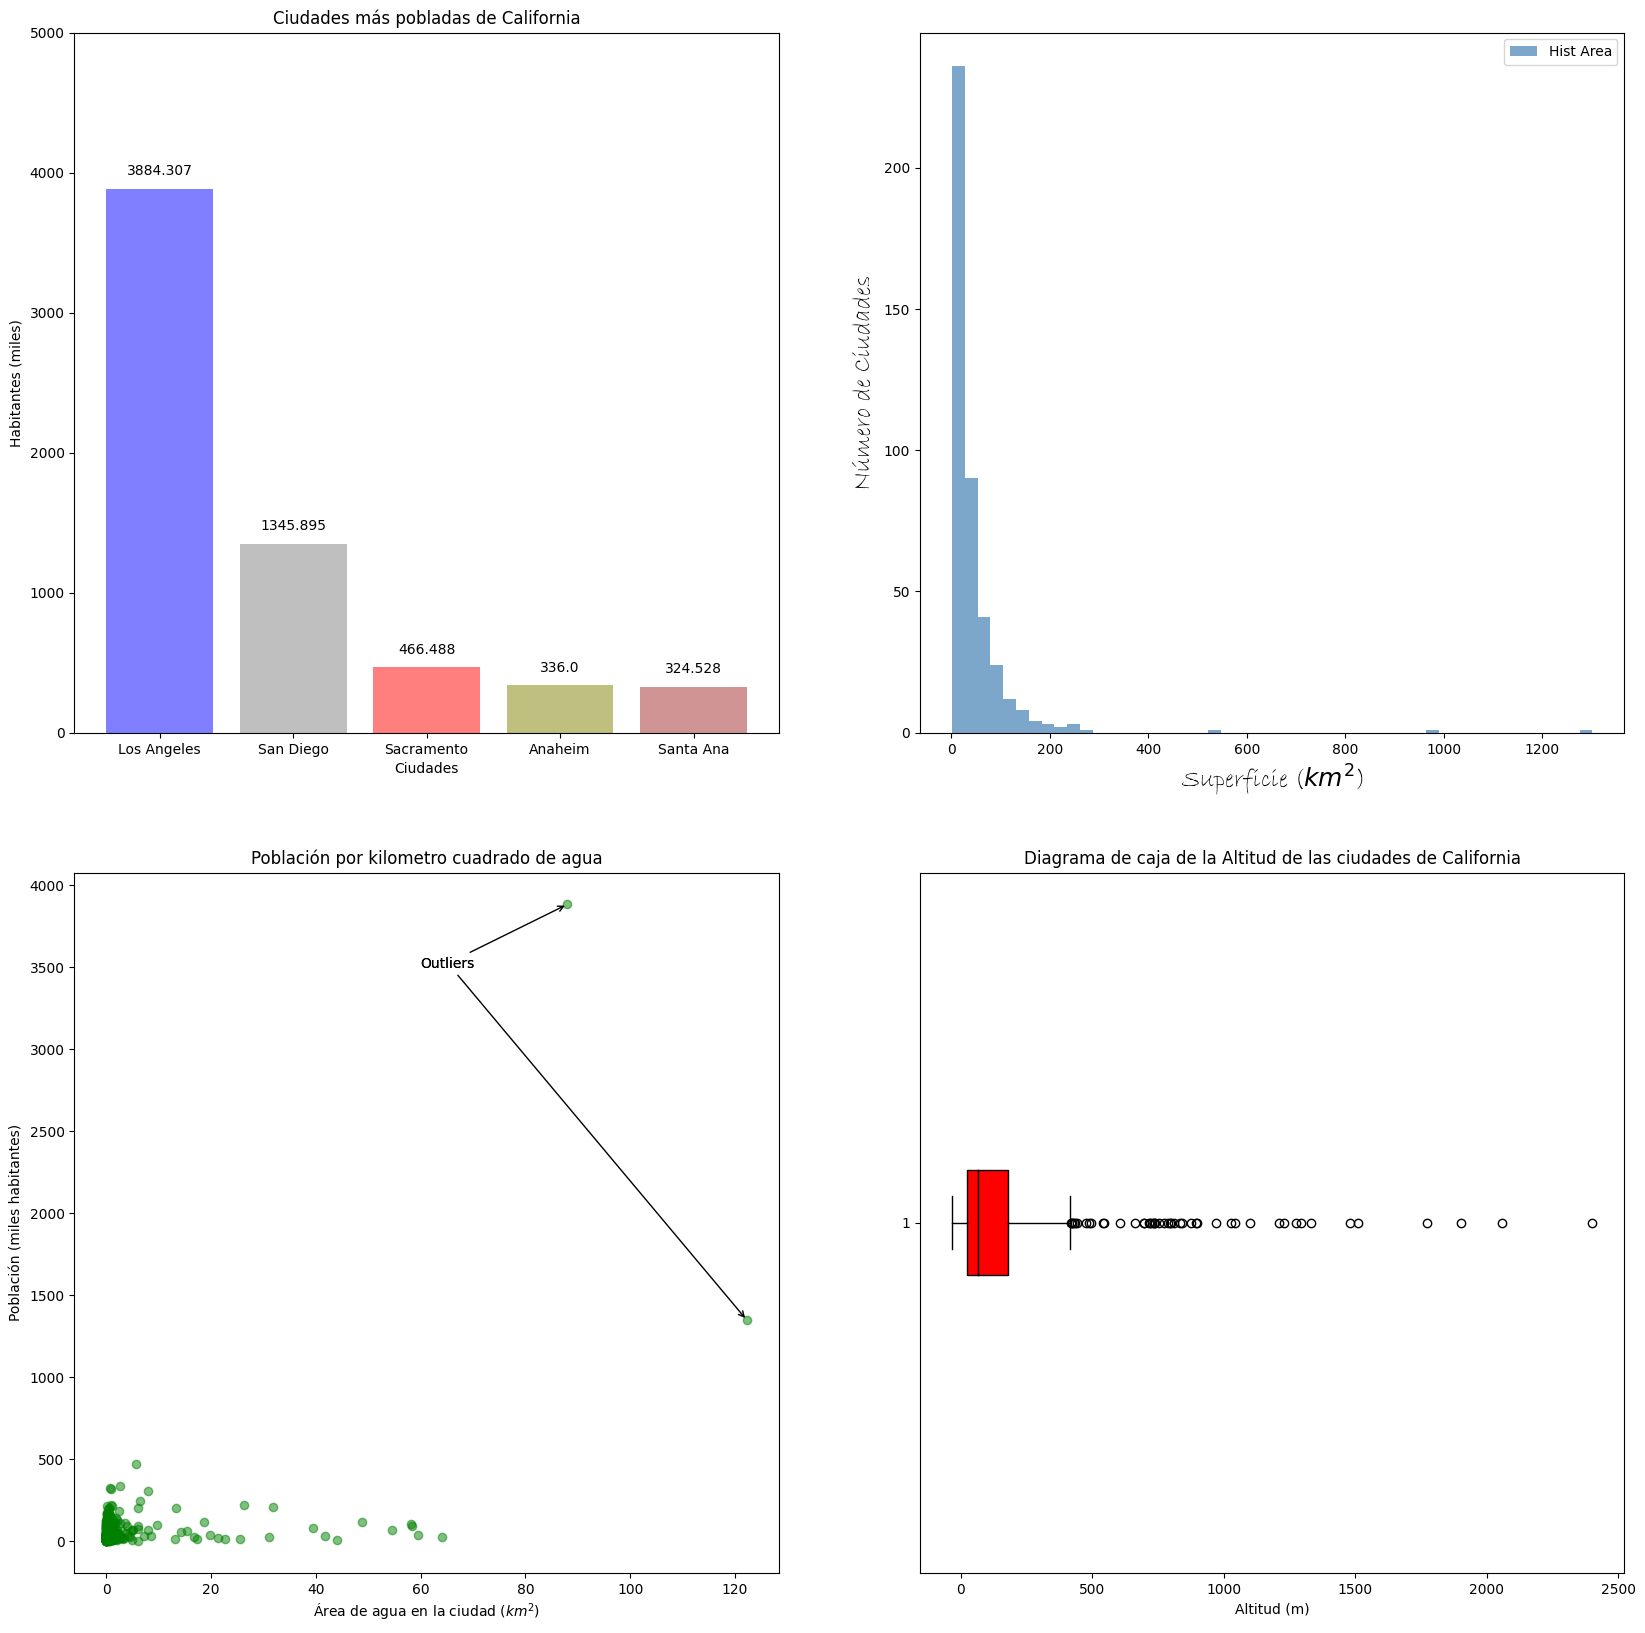

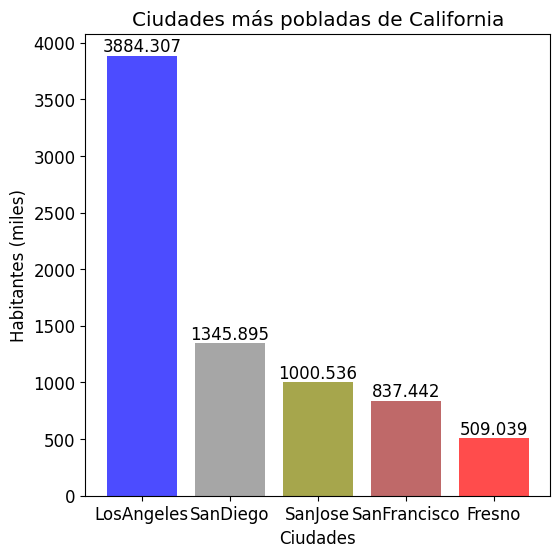

findfont: Font family 'Bradley Hand ITC' not found.
findfont: Font family 'Bradley Hand ITC' not found.
findfont: Font family 'Bradley Hand ITC' not found.
findfont: Font family 'Bradley Hand ITC' not found.
findfont: Font family 'Bradley Hand ITC' not found.


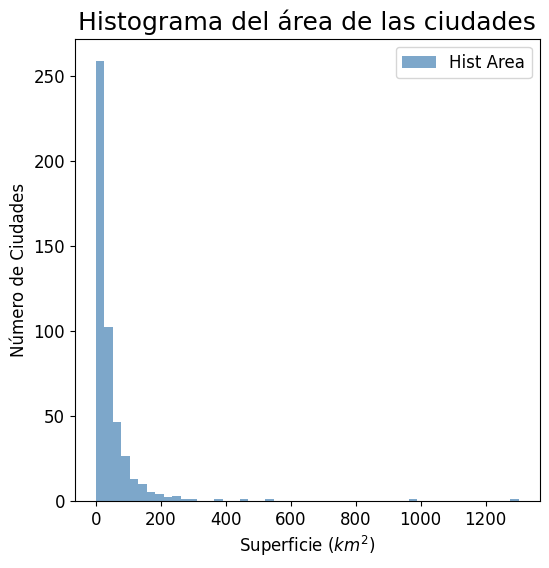

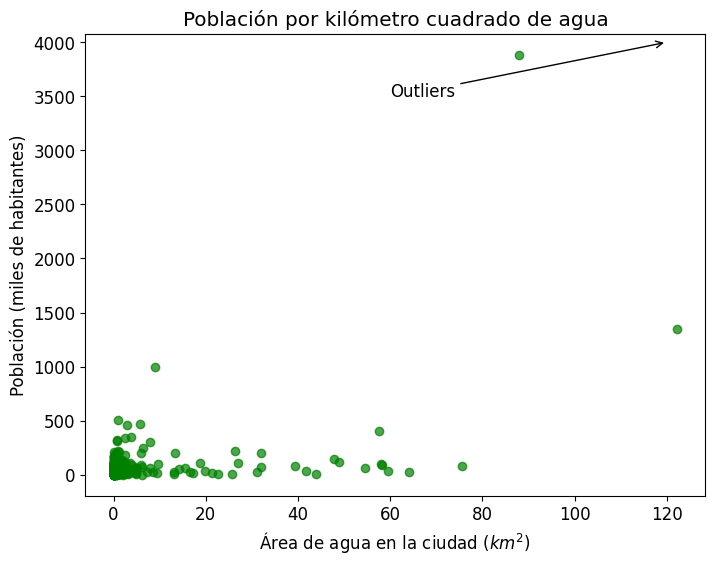

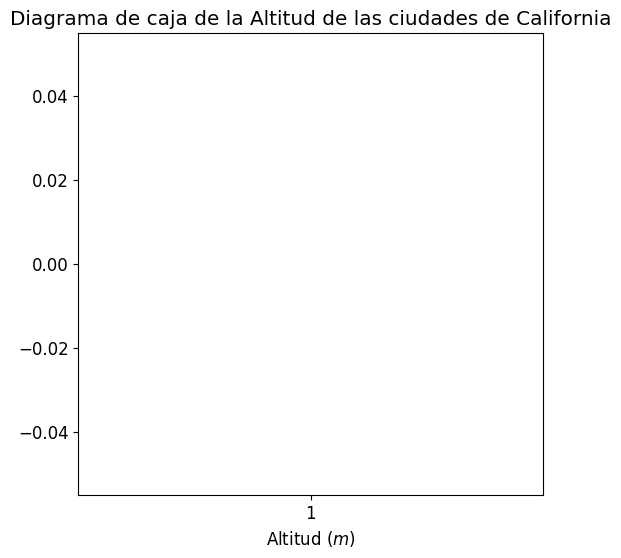

findfont: Font family 'Bradley Hand ITC' not found.
findfont: Font family 'Bradley Hand ITC' not found.
findfont: Font family 'Bradley Hand ITC' not found.
findfont: Font family 'Bradley Hand ITC' not found.
findfont: Font family 'Bradley Hand ITC' not found.


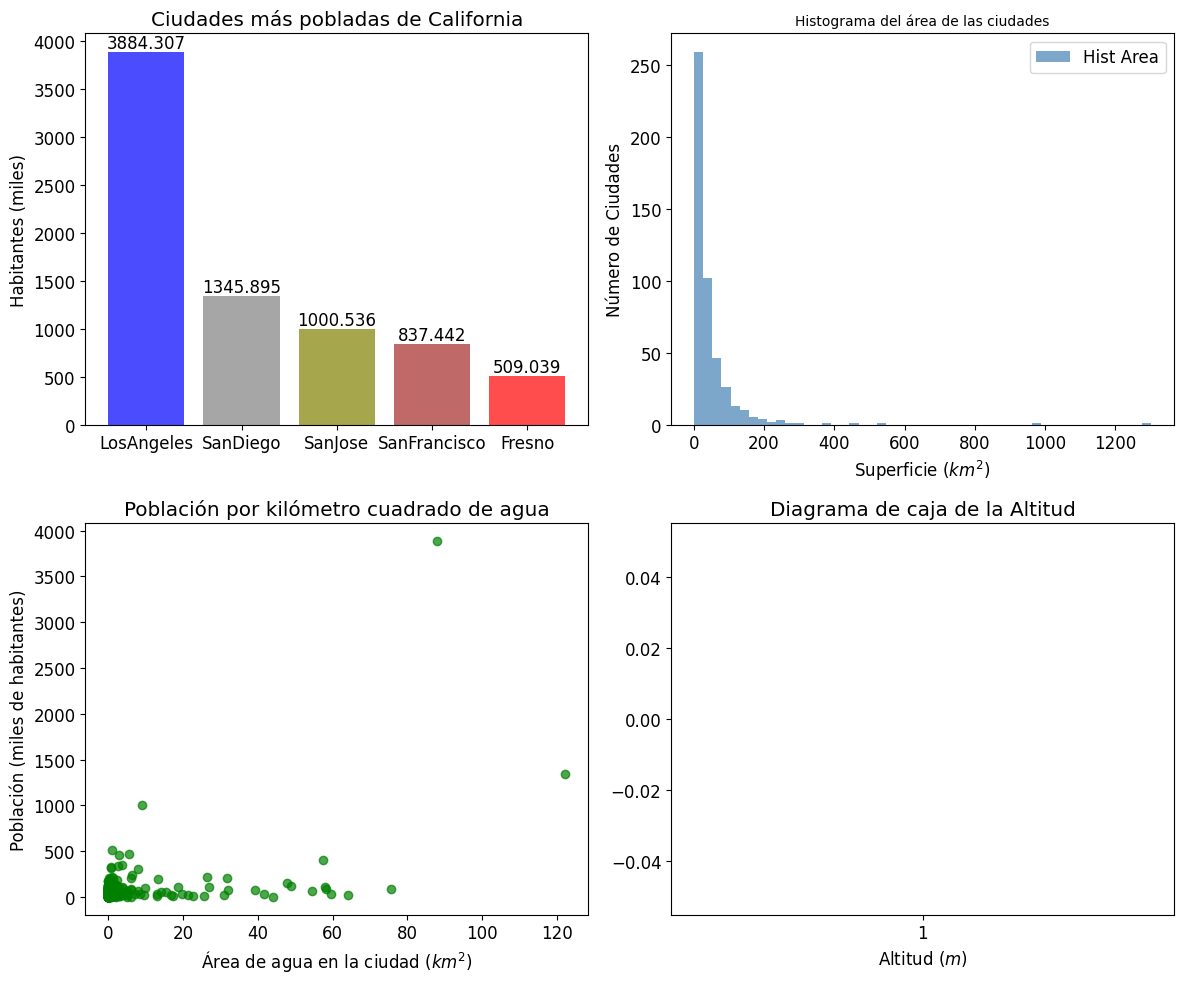

In [11]:
# 1. Ciudades más pobladas
top_cities = data.nlargest(5, 'population_total')
colors = ['blue', 'grey', 'olive', 'brown', 'red']

plt.figure(figsize=(6, 6))
bars = plt.bar(top_cities['city'], top_cities['population_total'] / 1000, color=colors, alpha=0.7)
for bar, value in zip(bars, top_cities['population_total'] / 1000):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.3f}', ha='center', va='bottom')

plt.title("Ciudades más pobladas de California")
plt.ylabel("Habitantes (miles)")
plt.xlabel("Ciudades")
plt.show()

# 2. Histograma del área
plt.figure(figsize=(6, 6))
plt.hist(data['area_total_km2'], bins=50, color='steelblue', alpha=0.7, label="Hist Area")
plt.title("Histograma del área de las ciudades", fontname="Bradley Hand ITC", fontsize=18)
plt.xlabel("Superficie $(km^2)$")
plt.ylabel("Número de Ciudades")
plt.legend()
plt.show()

# 3. Scatterplot: Población vs área de agua
plt.figure(figsize=(8, 6))
plt.scatter(data['area_water_km2'], data['population_total'] / 1000, alpha=0.7, color='green')
plt.title("Población por kilómetro cuadrado de agua")
plt.xlabel("Área de agua en la ciudad $(km^2)$")
plt.ylabel("Población (miles de habitantes)")
plt.annotate("Outliers", xy=(120, 4000), xytext=(60, 3500), arrowprops=dict(facecolor='black', arrowstyle="->"))
plt.show()

# 4. Boxplot de la altitud
plt.figure(figsize=(6, 6))
plt.boxplot(data['elevation_m'], patch_artist=True, boxprops=dict(facecolor='red', color='black'))
plt.title("Diagrama de caja de la Altitud de las ciudades de California")
plt.xlabel("Altitud $(m)$")
plt.show()

# Combinación de los cuatro gráficos
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# 1. Subplot: Ciudades más pobladas
bars = axs[0, 0].bar(top_cities['city'], top_cities['population_total'] / 1000, color=colors, alpha=0.7)
for bar, value in zip(bars, top_cities['population_total'] / 1000):
    axs[0, 0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.3f}', ha='center', va='bottom')
axs[0, 0].set_title("Ciudades más pobladas de California")
axs[0, 0].set_ylabel("Habitantes (miles)")

# 2. Subplot: Histograma del área
axs[0, 1].hist(data['area_total_km2'], bins=50, color='steelblue', alpha=0.7, label="Hist Area")
axs[0, 1].set_title("Histograma del área de las ciudades", fontname="Bradley Hand ITC", fontsize=10)
axs[0, 1].set_xlabel("Superficie $(km^2)$")
axs[0, 1].set_ylabel("Número de Ciudades")
axs[0, 1].legend()

# 3. Subplot: Scatterplot
axs[1, 0].scatter(data['area_water_km2'], data['population_total'] / 1000, alpha=0.7, color='green')
axs[1, 0].set_title("Población por kilómetro cuadrado de agua")
axs[1, 0].set_xlabel("Área de agua en la ciudad $(km^2)$")
axs[1, 0].set_ylabel("Población (miles de habitantes)")

# 4. Subplot: Boxplot de la altitud
axs[1, 1].boxplot(data['elevation_m'], patch_artist=True, boxprops=dict(facecolor='red', color='black'))
axs[1, 1].set_title("Diagrama de caja de la Altitud")
axs[1, 1].set_xlabel("Altitud $(m)$")

plt.tight_layout()
plt.show()

### #1.3

Graba la figura en un archivo y sube el archivo a tu repo personal también.

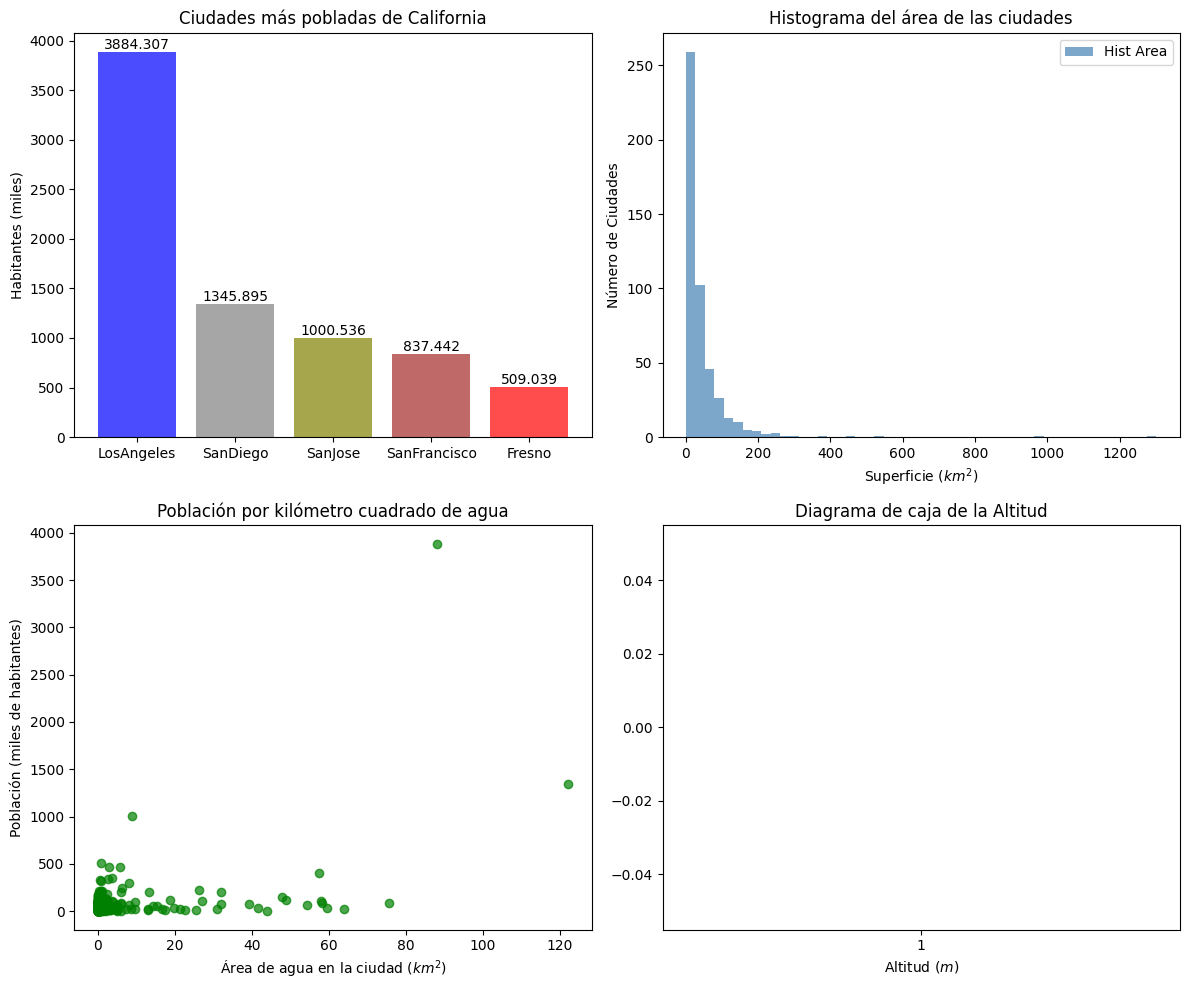

La figura se ha guardado en: california_cities_analysis.png


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar archivo
file_path = r"C:\Users\hardr\OneDrive\Documents\california_cities.csv"
data = pd.read_csv(file_path)

# 1. Gráficos combinados
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Subplot: Ciudades más pobladas
top_cities = data.nlargest(5, 'population_total')
colors = ['blue', 'grey', 'olive', 'brown', 'red']
bars = axs[0, 0].bar(top_cities['city'], top_cities['population_total'] / 1000, color=colors, alpha=0.7)
for bar, value in zip(bars, top_cities['population_total'] / 1000):
    axs[0, 0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.3f}', ha='center', va='bottom')
axs[0, 0].set_title("Ciudades más pobladas de California")
axs[0, 0].set_ylabel("Habitantes (miles)")

# Subplot: Histograma del área
axs[0, 1].hist(data['area_total_km2'], bins=50, color='steelblue', alpha=0.7, label="Hist Area")
axs[0, 1].set_title("Histograma del área de las ciudades")
axs[0, 1].set_xlabel("Superficie $(km^2)$")
axs[0, 1].set_ylabel("Número de Ciudades")
axs[0, 1].legend()

# Subplot: Scatterplot
axs[1, 0].scatter(data['area_water_km2'], data['population_total'] / 1000, alpha=0.7, color='green')
axs[1, 0].set_title("Población por kilómetro cuadrado de agua")
axs[1, 0].set_xlabel("Área de agua en la ciudad $(km^2)$")
axs[1, 0].set_ylabel("Población (miles de habitantes)")

# Subplot: Boxplot de la altitud
axs[1, 1].boxplot(data['elevation_m'], patch_artist=True, boxprops=dict(facecolor='red', color='black'))
axs[1, 1].set_title("Diagrama de caja de la Altitud")
axs[1, 1].set_xlabel("Altitud $(m)$")

plt.tight_layout()

# Guardar la figura como archivo PNG
output_file = "california_cities_analysis.png"
plt.savefig(output_file, dpi=300)  # Guarda la figura con alta resolución
plt.show()

print(f"La figura se ha guardado en: {output_file}")